In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics

import sklearn.preprocessing

import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab

import sklearn.mixture as mixture
import pyclustertend
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer

import random




In [2]:
movies_df =pd.read_csv('./movies.csv', encoding='latin1')
movies_df

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98.0,False,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121.0,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100.0,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142.0,False,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100.0,False,...,16.662,2021-11-26,6.8,108.0,2.0,1.0,1.0,10.0,2,4
9996,920143,0,Comedy,NaN,Caracol Televisiï¿½n|Dago Garcï¿½a Producciones,CO|CO,Colombia,0.0,97.0,False,...,491.706,2021-12-25,1.5,2.0,1.0,2.0,1.0,8.0,1,1
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112.0,False,...,565.658,2021-12-17,6.1,30.0,1.0,1.0,17.0,1.0,0,922017
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59.0,False,...,9.664,2021-12-17,6.0,1.0,1.0,0.0,0.0,0.0,922162,The Witcher: Fireplace


In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import pandas as pd

#Estadistica de Hokpins
movies_df =pd.read_csv('./movies.csv', encoding='latin1')
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

variables = movies_df[['budget', 'revenue', 'runtime']].dropna()
variables['budget'] = variables['budget'].astype(str).str.replace(' ', '')

print(hopkins_statistic(variables.values))
  

0.905987180155456


In [18]:
var = movies_df[['budget', 'revenue', 'runtime']].values
# var['budget'] = var['budget'].astype(str).str.replace(' ', '').astype(float)
print(len(var))
random.seed(123)
var_scale = sklearn.preprocessing.scale(var)

pyclustertend.hopkins(sklearn.preprocessing.scale(var), var.shape[0])

10000


0.007860200655999124

In [14]:
pyclustertend.vat(var_scale)

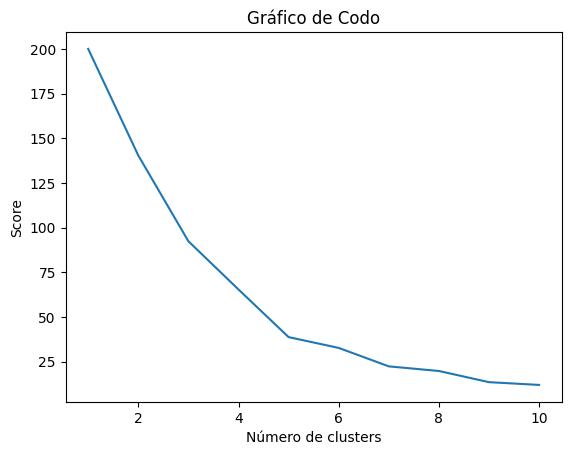

In [32]:
import pandas as pd
#import the packages
import pandas as pd # working with data
import numpy as np # working with arrays
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.preprocessing import scale

movies_df =pd.read_csv('./movies.csv', encoding='latin1')
# movies_df[['budget', 'revenue', 'runtime']] = movies_df[['budget', 'revenue', 'runtime']].fillna(0)
movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]] = movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].fillna(0)

# #drop rows with missing values
# movies_df = movies_df.dropna()


movies_df['budget'] = movies_df['budget'].astype(str).str.replace(' ', '').astype(float)




X = np.array(movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]])

# X = np.array(movies_df[["runtime", "revenue"]])




# take random sample of 1000
X_sample = X[np.random.choice(X.shape[0], 100, replace=False), :]


# Now you can scale this subset
X_scaled = scale(X_sample)

numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")

plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

# vat(X_scaled)

# ivat(X_scaled)







